## Problem1 1-D Kernel Density Estimator

## (a)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# Read the data
covid_df = pd.read_csv('data/COVIDincubation.txt')
covid_df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


<IPython.core.display.Javascript object>


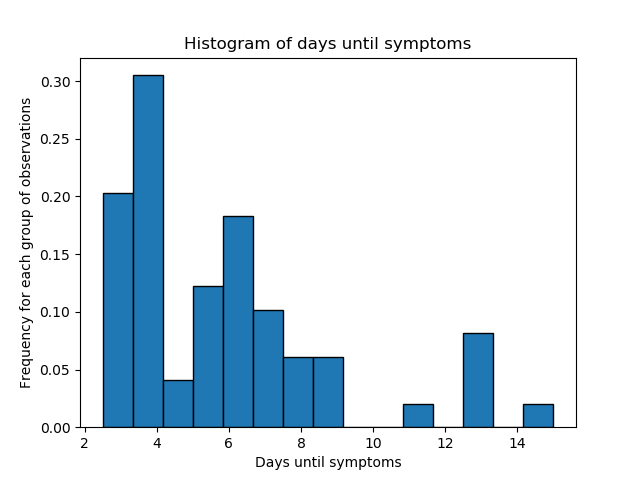

Text(0.5, 1.0, 'Histogram of days until symptoms')

In [3]:
symp_days_total = covid_df['symp_days'].values
# Make an overal histogram of the symp_days column
fig, ax = plt.subplots()
n_total, bin_cuts_total, patches_total = ax.hist(symp_days_total, density=True, bins=15, edgecolor='black')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each group of observations')
plt.title('Histogram of days until symptoms')

<IPython.core.display.Javascript object>


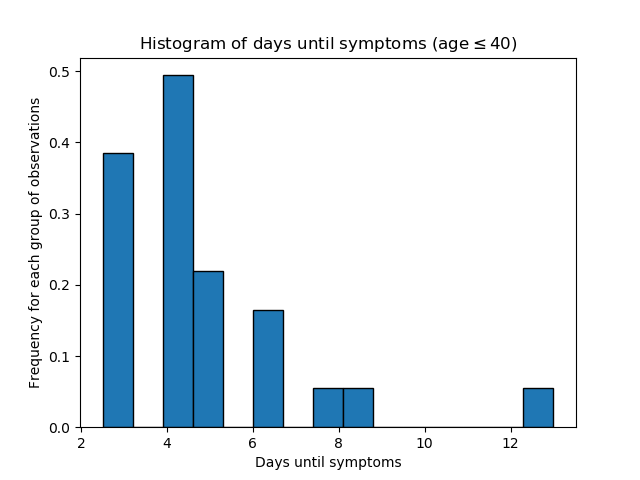

Text(0.5, 1.0, 'Histogram of days until symptoms (age$\\leq$40)')

In [4]:
symp_days_young = covid_df['symp_days'][covid_df['age'] <= 40].values
# Make an overal histogram of the symp_days column
fig, ax = plt.subplots()
n_young, bin_cuts_young, patches_youngl = ax.hist(symp_days_young, density=True, bins=15, edgecolor='black')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each group of observations')
plt.title('Histogram of days until symptoms (age$\leq$40)')

<IPython.core.display.Javascript object>


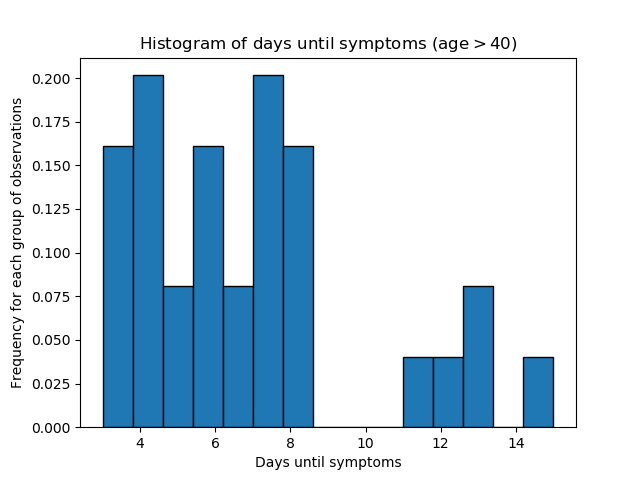

Text(0.5, 1.0, 'Histogram of days until symptoms (age$>$40)')

In [5]:
symp_days_old = covid_df['symp_days'][covid_df['age'] > 40].values
# Make an overal histogram of the symp_days column
fig, ax = plt.subplots()
n_old, bin_cuts_old, patches_old = ax.hist(symp_days_old, density=True, bins=15, edgecolor='black')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each group of observations')
plt.title('Histogram of days until symptoms (age$>$40)')

## (b)

In [6]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# Find optimal bandwidth for KDE (total sample)
N_total = symp_days_total.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_total = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_total.fit(symp_days_total.reshape((N_total, 1)))
bandwidth_total_opt = grid_total.best_params_['bandwidth']

<IPython.core.display.Javascript object>


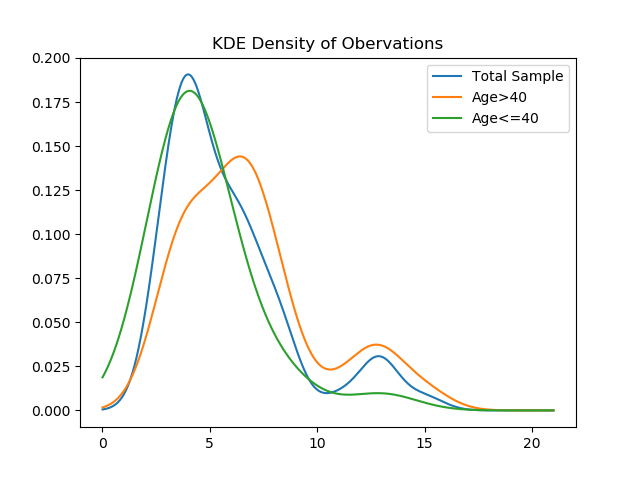

Text(0.5, 1.0, 'KDE Density of Obervations')

In [7]:
# plot the KDE (total sample)
kde_total = KernelDensity(bandwidth=bandwidth_total_opt, kernel='gaussian')
kde_total.fit(symp_days_total.reshape((N_total, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_total = kde_total.score_samples(x_pts).reshape((1000, 1))
plt.plot(x_pts, np.exp(logprob_total), label=r'Total Sample')
plt.legend()
plt.title('KDE Density of Obervations')

In [8]:
# Find optimal bandwidth for KDE (for age > 40)
N_old = symp_days_old.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_old = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_old.fit(symp_days_old.reshape((N_old, 1)))
bandwidth_total_opt = grid_old.best_params_['bandwidth']

# plot the KDE (age>40 sample)
kde_old = KernelDensity(bandwidth=bandwidth_total_opt, kernel='gaussian')
kde_old.fit(symp_days_old.reshape((N_old, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_old = kde_old.score_samples(x_pts).reshape((1000, 1))
plt.plot(x_pts, np.exp(logprob_old), label=r'Age>40')
plt.legend()

In [9]:
# Find optimal bandwidth for KDE (for age <= 40)
N_young = symp_days_young.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_young = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_young.fit(symp_days_young.reshape((N_young, 1)))
bandwidth_total_opt = grid_young.best_params_['bandwidth']

# plot the KDE (age<=40 sample)
kde_young = KernelDensity(bandwidth=bandwidth_total_opt, kernel='gaussian')
kde_young.fit(symp_days_young.reshape((N_young, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_old = kde_young.score_samples(x_pts).reshape((1000, 1))
plt.plot(x_pts, np.exp(logprob_old), label=r'Age<=40')
plt.legend()

### (c)

The frequency distribution of the samples indicates that on average young individuals (age $\leq 40$) has shorter incubation periods than old individuals (age $> 40$). 

## Problem2 2-D Kernel Density Estimator

### (a)

In [10]:
from scipy.stats import gaussian_kde
%matplotlib notebook

BQ_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')
BQ_data.size

511

<IPython.core.display.Javascript object>


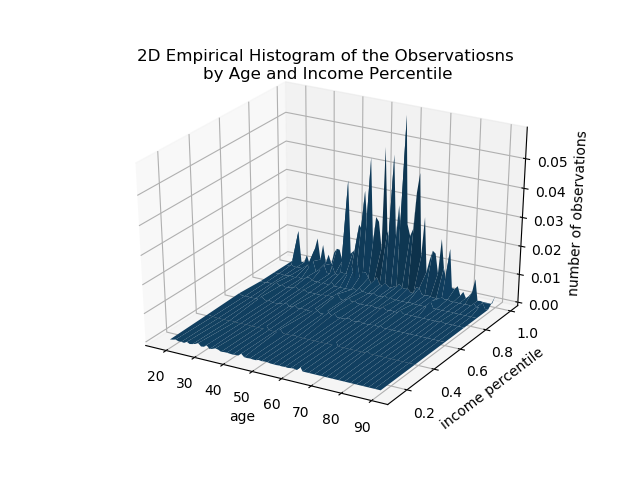

Text(0.5, 0.92, '2D Empirical Histogram of the Observatiosns \nby Age and Income Percentile')

In [11]:
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

# age_mat = np.tile(age_vec.reshape((73, 1)), (1, 7))
# lamdas_mat = np.tile(lambdas_mdpts.reshape((1, 7)), (73, 1))
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, BQ_data.reshape((73, 7)))
ax.set_xlabel('age')
ax.set_ylabel('income percentile')
ax.set_zlabel('number of observations')
plt.title('2D Empirical Histogram of the Observatiosns \nby Age and Income Percentile')

### (b)

In [12]:
bq_ind_df = pd.read_csv('data/BQ_ind_data.txt')
bq_ind_df.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


In [13]:
bq_ind_mat = bq_ind_df.values
kde_density = gaussian_kde(bq_ind_mat.T, bw_method=0.4)
age_array = bq_ind_df['age']
income_array = bq_ind_df['income_pctl']
age_min, age_max = age_array.min(), age_array.max()
income_min, income_max = income_array.min(), income_array.max()
age_pos, income_pos = np.mgrid[age_min:age_max:73j, income_min:income_max:7j]
positions = np.vstack([age_pos.ravel(), income_pos.ravel()])
freq = np.reshape(kde_density(positions), age_pos.shape)

<IPython.core.display.Javascript object>


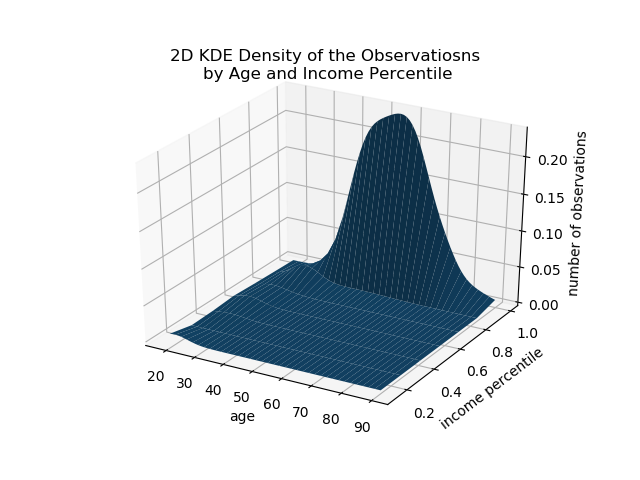

Text(0.5, 0.92, '2D KDE Density of the Observatiosns \nby Age and Income Percentile')

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_pos, income_pos, freq)
ax.set_xlabel('age')
ax.set_ylabel('income percentile')
ax.set_zlabel('number of observations')
plt.title('2D KDE Density of the Observatiosns \nby Age and Income Percentile')

Choosing $\lambda = 0.3$ can give a smooth surface that is neither overfitting nor underfitting the data. 

In [15]:
# Calculate the estimated density of age = 61, income_pctl in (90, 99]

print('Pr(number of observations | age=61, j=6) = {freq[61 - 18 + 1][5]}')

Pr(number of observations | age=61, j=6) = {freq[61 - 18 + 1][5]}
